Note: All code in script is sourced from various internet sources, from mentor Tomasz Popiel and from Alan Chalk at Sabre Insurance.

## HDBSCAN

Contents:

-  Start_: import modules, set directories, load data  
    ('03_distancematrix_20%_exclude_target.hkl') ('03_distancematrix_20%_exclude_target_tqv3_av78.hkl')  
 
-  Parameter Selection 

     -  1. Distance matrix : Exclude target variablesa (Model 1)
     -  2. Distance matrix : Exclude target & tq_v3 & av_7_8 (Model 2)

- HDBSCAN 

-  Target variables analysis

-  t-SNE Visualisation

Notes: Two distance matrix used is 20% of data  
one EXCLUDES the target varaibles, one EXCLUDES the target varaibles & 'tq_v3' & 'a_v7_8'

### Start_:

Import modules

In [1]:
import os
import hickle as hkl
import gc

import pandas as pd
import numpy as np

from scipy.spatial.distance import squareform

import collections, numpy

import hdbscan 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from tabulate import tabulate

/Users/hujuiting/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/hujuiting/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Set directories

In [2]:
print(os.getcwd())

dirRawData = "../RawData/"
dirPData = "../PData/"
dirPOutput = "../POutput/"

/Users/hujuiting/Desktop/GROUP PROJECT/PCode


Load data

In [3]:
fname = dirPData + '03_distancematrix_20%_exclude_target.hkl' 
#fname = dirPData + '03_distancematrix_20%_exclude_target_tqv3_av78.hkl' 
with open(fname, 'r') as f:
    dict_ = hkl.load(f)


# %% Load data

D_3 = dict_['D_3']
df_all_2 = dict_['df_all_2'] # 20% of non scaled data 
df_all = dict_['df_all'] # 20% of scaled data

del fname

In [4]:
D_3_square = squareform(D_3)
del D_3
gc.collect()

131

### Parameter Selection 

#### 1. Distance matrix : Exclude target variablesa (Model 1)
Test the parameters : min_cluster_size, min_samples, cluster_selection_method, allow_single_cluster  
Best result : min_cluster_size :  80 min_samples :  1 outliers :  8244 max_labels :  11  
Issue : too many outliers!

In [5]:
sizes1 = [40,50,60,70,80,90]
sizes2 =  (100 + 40 * np.arange(10)).tolist()
sizes = sizes1+sizes2

samples = 1

for i in sizes:
    
    clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size = i, min_samples = samples)
    clusterer.fit(D_3_square)
    
    # count number of data points in each cluster 
    clustersize = collections.Counter(clusterer.labels_)  
    outliers = clustersize[-1]
    
    
    print("min_cluster_size : ", i, 'min_samples : ', samples , "outliers : ", outliers, "max_labels : ", max(clustersize))

min_cluster_size :  40 min_samples :  1 outliers :  8981 max_labels :  24
min_cluster_size :  50 min_samples :  1 outliers :  8857 max_labels :  18
min_cluster_size :  60 min_samples :  1 outliers :  8252 max_labels :  12
min_cluster_size :  70 min_samples :  1 outliers :  8244 max_labels :  11
min_cluster_size :  80 min_samples :  1 outliers :  8244 max_labels :  11
min_cluster_size :  90 min_samples :  1 outliers :  8413 max_labels :  9
min_cluster_size :  100 min_samples :  1 outliers :  8413 max_labels :  9
min_cluster_size :  140 min_samples :  1 outliers :  8413 max_labels :  9
min_cluster_size :  180 min_samples :  1 outliers :  8377 max_labels :  8
min_cluster_size :  220 min_samples :  1 outliers :  8560 max_labels :  7
min_cluster_size :  260 min_samples :  1 outliers :  8802 max_labels :  6
min_cluster_size :  300 min_samples :  1 outliers :  8556 max_labels :  5
min_cluster_size :  340 min_samples :  1 outliers :  5656 max_labels :  1
min_cluster_size :  380 min_samples :  

#### 2. Distance matrix : Exclude target & tq_v3 & av_7_8 (Model 2)
It did not much better than before, so it would not be considered anymore.

In [6]:
# sizes1 = [40,50,60,70,80,90]
# sizes2 =  (100 + 40 * np.arange(10)).tolist()
# sizes = sizes1+sizes2

# samples = 1

# for i in sizes:
    
#     clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size = i, min_samples = samples)
#     clusterer.fit(D_3_square)
    
#     # count number of data points in each cluster 
#     clustersize = collections.Counter(clusterer.labels_)  
#     outliers = clustersize[-1]
    
    
#     print("min_cluster_size : ", i, 'min_samples : ', samples , "outliers : ", outliers, "max_labels : ", max(clustersize))

min_cluster_size :  40 min_samples :  1 outliers :  9168 max_labels :  25
min_cluster_size :  50 min_samples :  1 outliers :  8244 max_labels :  15
min_cluster_size :  60 min_samples :  1 outliers :  8239 max_labels :  12
min_cluster_size :  70 min_samples :  1 outliers :  8418 max_labels :  12
min_cluster_size :  80 min_samples :  1 outliers :  8418 max_labels :  12
min_cluster_size :  90 min_samples :  1 outliers :  8380 max_labels :  9
min_cluster_size :  100 min_samples :  1 outliers :  8380 max_labels :  9
min_cluster_size :  140 min_samples :  1 outliers :  8380 max_labels :  9
min_cluster_size :  180 min_samples :  1 outliers :  8378 max_labels :  8
min_cluster_size :  220 min_samples :  1 outliers :  8563 max_labels :  7
min_cluster_size :  260 min_samples :  1 outliers :  5467 max_labels :  1
min_cluster_size :  300 min_samples :  1 outliers :  8593 max_labels :  5
min_cluster_size :  340 min_samples :  1 outliers :  5467 max_labels :  1
min_cluster_size :  380 min_samples :  

### HDBSCAN 

Distance matrix : Exclude target variables

In [6]:
cluster = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=80, min_samples = 1, gen_min_span_tree=True)
cluster.fit(D_3_square)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=80, min_samples=1, p=None,
        prediction_data=False)

count number of data points in each cluster 

In [7]:
clustersize = collections.Counter(cluster.labels_)  
clustersize

Counter({-1: 8244,
         0: 1269,
         7: 382,
         10: 290,
         9: 742,
         5: 487,
         4: 328,
         11: 526,
         2: 183,
         6: 177,
         1: 85,
         8: 242,
         3: 84})

#### clusterer outlier score  
A higher score inferrs more outlier objects.

In [8]:
cluster.outlier_scores_.mean()

0.11987448384972647

#### clusterer probability score
A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score)   
while a score of 1.0 represents a sample that is at the heart of the cluster 

In [9]:
cluster.probabilities_.mean()

0.3283192814905127

### Target varaibles analysis

Make dataframe 'info' of each data entry ID, tq_v3, target varaibles, cluster label

In [10]:
clustering_labels = pd.DataFrame(cluster.labels_, columns=['cluster'])

In [11]:
#using df_all_2 because this is the non-scaled dataset
datainfo = pd.DataFrame(df_all_2[['id', 'tq_v3','tq_dt1_mean','tq_dt2_mean','tq_dt3_mean','tq_dt4_mean','tq_dt1_std','tq_dt2_std','tq_dt3_std','tq_dt4_std']])

In [12]:
clustering_labels.reset_index(drop=True, inplace=True)
datainfo.reset_index(drop=True, inplace=True)

In [13]:
info = pd.concat([datainfo,clustering_labels], axis = 1)

In [14]:
info.head()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster
0,12468,16,0.0984,0.0328,0.0,0.0164,0.3514,0.1796,0.0,0.128,-1
1,32442,4,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,-1
2,26216,3,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,-1
3,50550,1,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,0
4,45726,2,0.1250,0.0000,0.0,0.0000,0.3536,0.0000,0.0,0.000,-1


To get summary statistics of the target varaibles for each cluster

In [15]:
# Summary statistics of target varaibles for cluster 0
info[info.cluster == 0].describe()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.0
mean,32283.423956,1.200946,0.077640,0.055261,0.005193,0.009536,0.226731,0.174048,0.034696,0.043423,0.0
std,18845.899723,4.818615,0.266106,0.244260,0.066413,0.088791,0.179503,0.143579,0.057297,0.053243,0.0
min,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16559.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,31887.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287727,0.226921,0.050070,0.060892,0.0
75%,47673.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.287727,0.226921,0.050070,0.060892,0.0
max,65324.000000,70.000000,3.000000,4.000000,1.000000,1.000000,1.732100,1.341600,1.414200,0.707100,0.0


Plotting the target varaible values for each cluster on box plots (one plot for each of the 8 target varaibles) to assess the distribution of the target variables in each cluster.

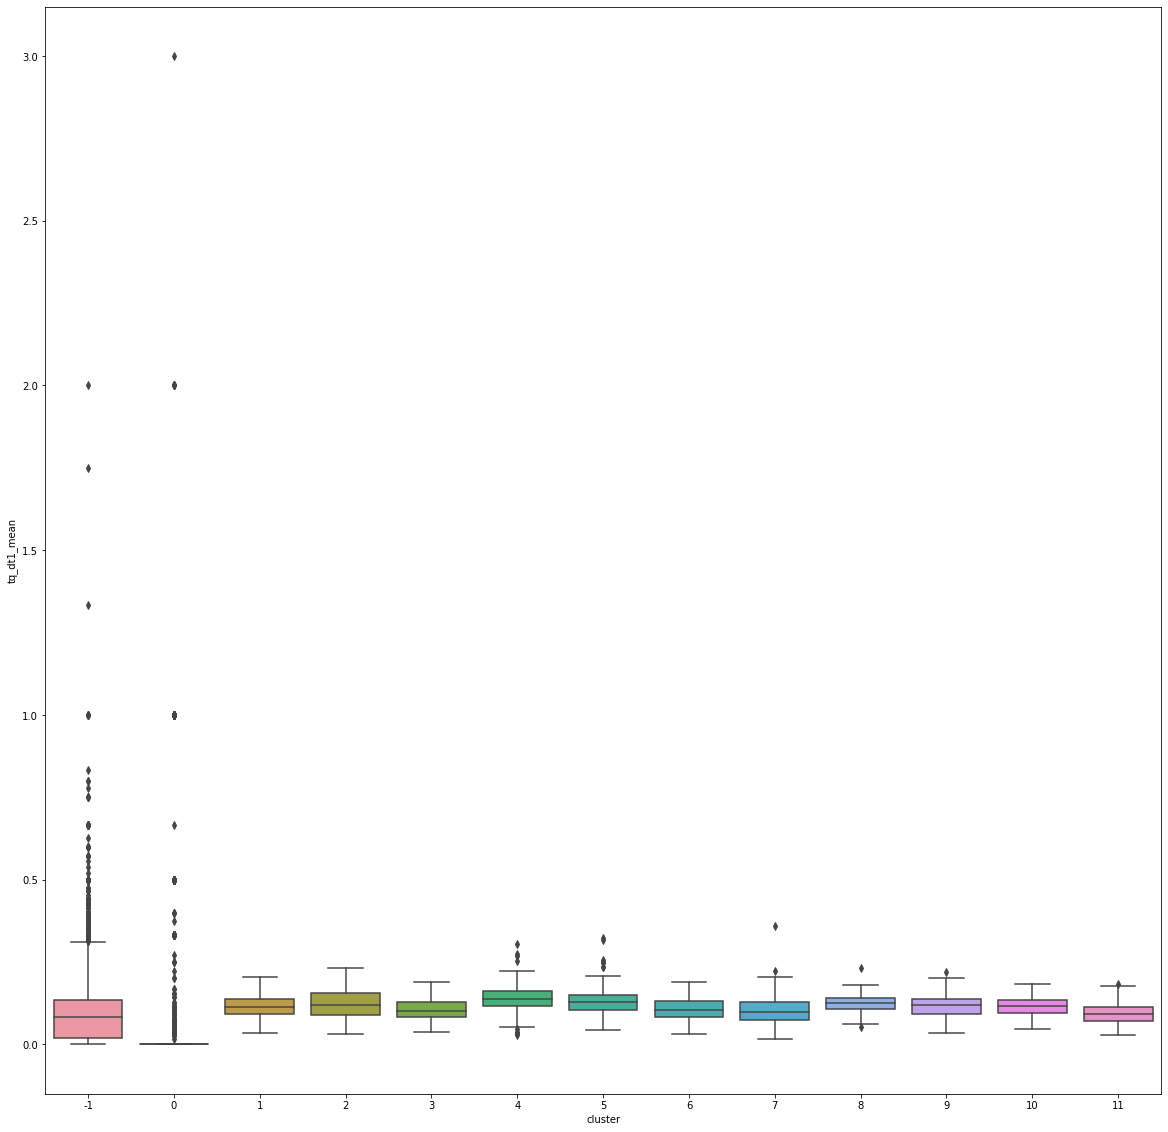

In [16]:
plt.figure(figsize=(20,20))
sns.boxplot(x='cluster', y= 'tq_dt1_mean', data = info) # Specity target varaible to plot

To list which data entries (by id) belong to cluster 0 (for example)

In [17]:
cluster0 = info[info.cluster == 0] 
print(cluster0.shape)
print(cluster0.id)

(1269, 11)
3        50550
9        39706
10        8406
26       19234
65       31951
77       40663
81       34001
90       44587
94       25362
103      31054
114      16559
120       1821
132      38430
154      17680
163      35668
178      30010
182      38437
191      22475
192      27220
196      46580
200      28599
216       3117
251      62167
254      42012
283      51760
287      15760
317      42743
327      24242
339      12654
340      58969
         ...  
12681    29938
12682    23023
12696    16388
12703    49764
12705    62716
12720    45579
12721    36056
12724    21905
12730    13033
12733    39106
12745    14258
12752    20043
12758    15498
12782    56284
12806    32784
12820    43484
12822       95
12859     6164
12868     6550
12869    46878
12871    37884
12872    37830
12874    62711
12879    44358
12908    59604
12920     6259
12963     1360
12991    54311
13021    13797
13022    19166
Name: id, Length: 1269, dtype: int64


### t-SNE visualization 

Plot the clusters with t-SNE to visualise the clusters

In [18]:
from sklearn.manifold import TSNE
D_square_TSNE = TSNE(n_components=2, metric = 'precomputed', random_state = 123).fit_transform(D_3_square) #use two componenets, so can be plotted in 2D

# Select the 0th feature: xs
x = D_square_TSNE[:,0]
# Select the 1st feature: ys
y = D_square_TSNE[:,1]

Visualising the dataset

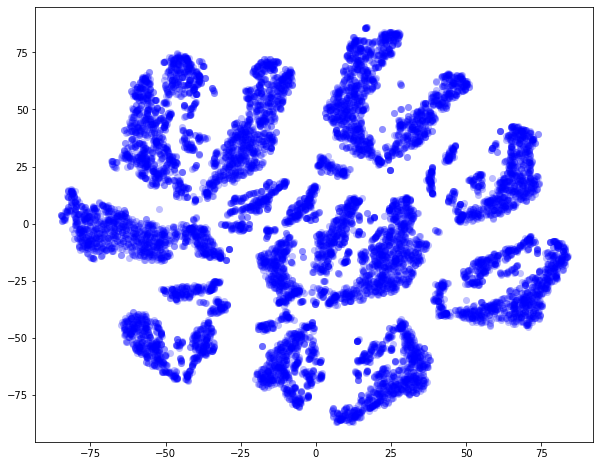

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=50, linewidth=0, c='b', alpha=0.25)

Visualising the clusters

In [20]:
D_square_TSNE =  pd.DataFrame(D_square_TSNE, columns=['D_square_TSNE_x','D_square_TSNE_y'])

In [21]:
D_square_TSNE = pd.concat([D_square_TSNE,clustering_labels], axis = 1)

In [22]:
D_square_TSNE.head()

,D_square_TSNE_x,D_square_TSNE_y,cluster
0,-21.228294,32.767761,-1
1,3.023602,-11.961539,-1
2,3.882936,29.398232,-1
3,-11.283945,-29.191425,0
4,4.687564,-17.569279,-1


In [23]:
#set font size of labels on matplotlib plots
plt.rc('font', size=20)

# set colour pallet
custom = ['#fdcdac',"#de77ae", "#377eb8", "#95a5a6", "#e74c3c", "#34495e", "#b2df8a","#ffeda0","#feb24c",'#dd1c77','#9ecae1','#d95f0e','#d8b365']
sns.set_palette(custom)

Visualise the clusters on t-SNE plot (colour coded by cluster)

/Users/hujuiting/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


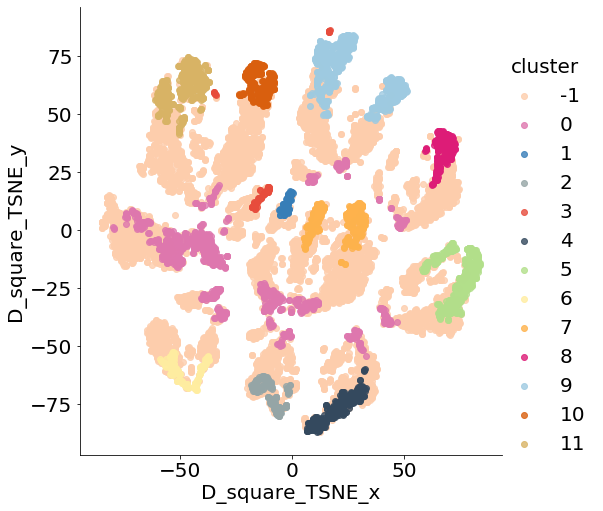

In [24]:
sns.lmplot(data=D_square_TSNE, x='D_square_TSNE_x', y='D_square_TSNE_y', hue='cluster', size =7.5, fit_reg=False, legend=True, legend_out=True
          )  

Plot the hierarchy of the clusters produced by HDBSCAN 

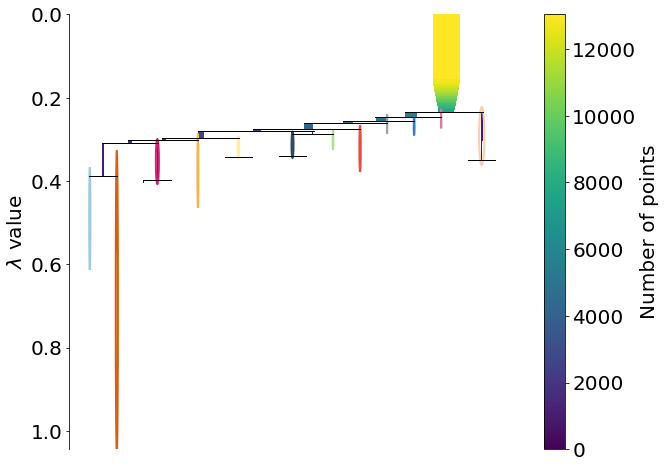

In [25]:
plt.figure(figsize=(10,8))
cluster.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette(custom))

Visualise the outliers produced by HDBSCAN

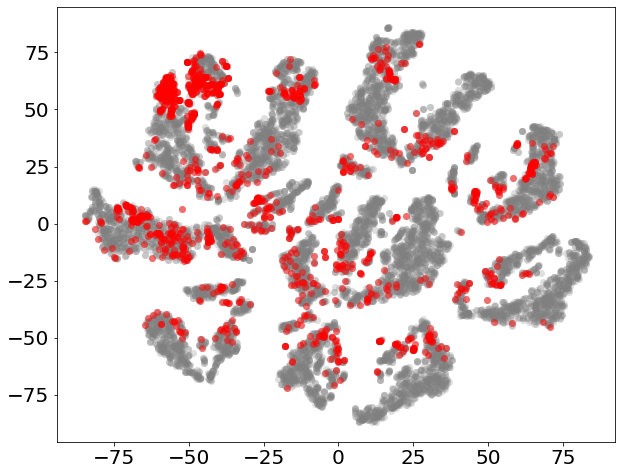

In [26]:
plt.figure(figsize=(10, 8))
threshold = pd.Series(cluster.outlier_scores_).quantile(0.9)
outliers = np.where(cluster.outlier_scores_ > threshold)[0]
plt.scatter(x,y, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(x[outliers],y[outliers], s=50, linewidth=0, c='red', alpha=0.5)